<a href="https://colab.research.google.com/github/Ssactl/Applied-AI-in-Transportation/blob/main/Module2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


In [8]:
#load the data

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
df = pd.read_csv(url)

df.head(10)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:03,10033,41355,1,-23,0,39,-4,28.641509
1,01/05/2022 07:21,10033,41356,1,168,0,39,181,27.880597
2,01/05/2022 07:37,10033,44400,1,231,0,39,244,27.852941
3,01/05/2022 07:50,10033,44399,1,150,17,39,143,27.826087
4,01/05/2022 19:29,10033,44060,1,965,35,51,947,42.029412
5,01/05/2022 19:58,10033,41351,1,33,19,46,30,38.970588
6,01/05/2022 20:14,10033,44399,1,75,26,46,63,38.840580
7,01/05/2022 20:28,10033,41356,1,58,15,46,52,34.059701
8,01/05/2022 20:57,10033,44060,1,904,35,46,888,34.102941
9,01/05/2022 21:00,10033,41357,1,141,12,46,140,34.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Arrival_time           2179 non-null   object 
 1   Stop_id                2179 non-null   int64  
 2   Bus_id                 2179 non-null   int64  
 3   Line_id                2179 non-null   int64  
 4   Arrival_delay          2179 non-null   int64  
 5   Dwell_time             2179 non-null   int64  
 6   Scheduled_travel_time  2179 non-null   int64  
 7   Upstream_stop_delay    2179 non-null   int64  
 8   Recurrent_delay        2179 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 153.3+ KB


In [11]:
# find out how much influence input variables have on the values in the "Arrival_delay"
corr_matrix = df.corr()
corr_matrix['Arrival_delay'].sort_values(ascending=False)

<ipython-input-11-f7de11243f6a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Arrival_delay            1.000000
Upstream_stop_delay      0.993935
Dwell_time               0.218745
Recurrent_delay          0.162692
Scheduled_travel_time    0.100695
Bus_id                   0.002019
Stop_id                       NaN
Line_id                       NaN
Name: Arrival_delay, dtype: float64

In [12]:
# remove columns that have little influence and cloumns that are no longer needed
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

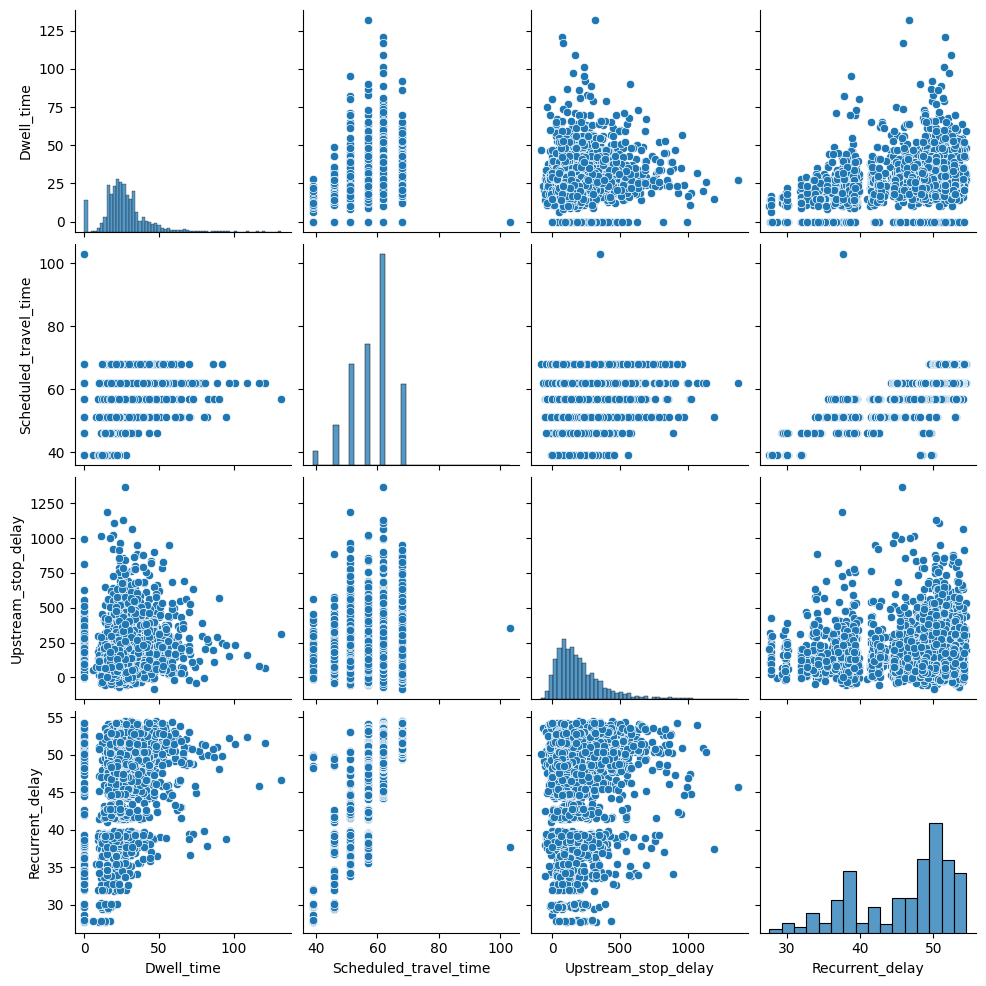

In [14]:
# visualize the relationships between different features
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']

sns.pairplot(x)

In [15]:
# split the data into training dataset and testing dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
# Grid search
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01,0.05,0.1,0.2,0.3],
    'subsample':[0.5,0.6,0.7,0.8],
    'n_estimators':[100,200,300]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END learning_rate=0.01, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.01, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.01, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.01, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.01, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.01, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, n_estimators=100, 

In [28]:
# train a xGBoost model
from sklearn.model_selection import cross_val_score


# Create an xGBoost model with the best parameters from the grid search
best_xGB = XGBRegressor(learning_rate=best_params['learning_rate'], subsample=best_params['subsample'],n_estimators=best_params['n_estimators'])

# Perform cross-validation on the entire dataset
cv_scores = cross_val_score(best_xGB, x , y, cv=5, verbose=2).mean()
print(cv_scores)

[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
0.9919863984152558


In [29]:
# create a xGBoost regression model and train it using the training data
best_xGB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [30]:
# make predictions and evaluate the performance of the xGBoost regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = best_xGB.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 10.390321016516708
Mean Squared Error: 204.63208548795376
R-squared: 0.9931377475193679


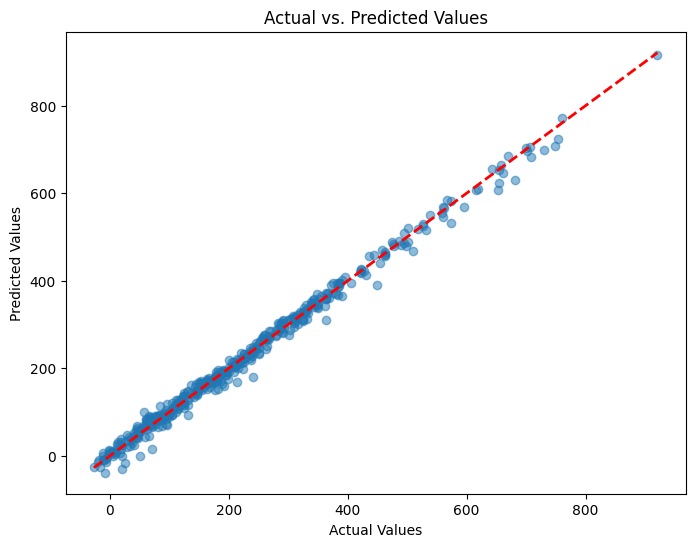

In [31]:
# visualize the preditions

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()